# Modelo de detección de emociones en perros

Conectar con Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Importar librerías

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

Obtener las imágenes

In [ ]:
%cd "/content/drive/MyDrive/IA/Proyecto"
path = "/content/drive/MyDrive/IA/Proyecto"

base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

/content/drive/MyDrive/IA/Proyecto


Data augmentation

Se voltearon las imágenes vertical y horizontalmente y se rotaron las imágenes 40 grados porque las fotos de perros suelen ser tomadas desde distintos ángulos. También se alargaron las imágenes para obtener escenarios con perros de distintas dimensiones.

Found 900 images belonging to 3 classes.


<Figure size 640x480 with 0 Axes>

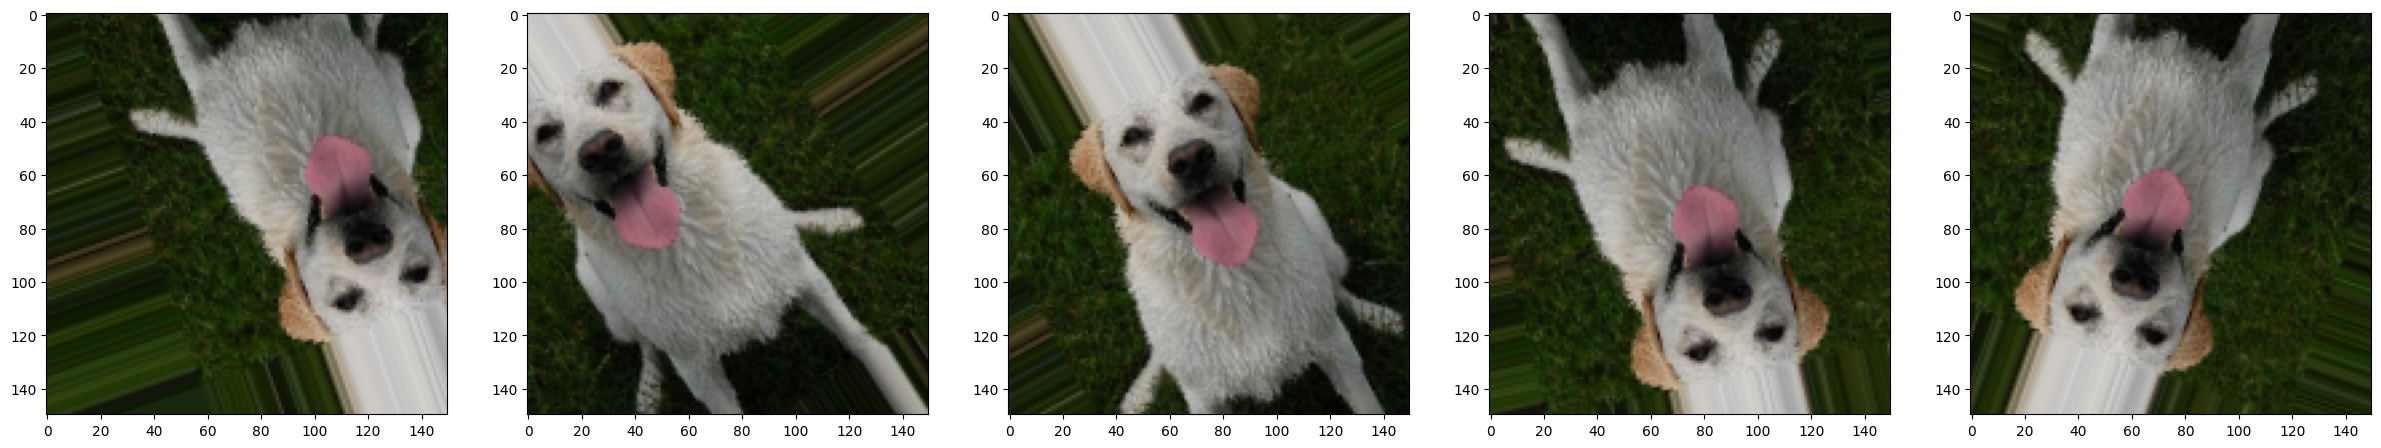

In [ ]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							horizontal_flip = True,
							vertical_flip = True,)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical',
							)


plt.figure()

f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Definición de las capas del modelo

En febrero de 2023 se publicó una investigación realizada por miembros de la Universidad de Tonji en China llamada "Pet dog facial expression recognition based on convolutional neural network and improved whale optimization algorithm".

La investigación hace una comparación de tres modelos; SVM, LeNet-5 y se proponen varios modelos CNN basados VGG-16 que fueron modificados. Los modelos con mayor exactitud y menor pérdida fueron los CNN basados en VGG-16, por lo que se utilizarán en este proyecto.

In [ ]:
model = models.Sequential()

conv_base= VGG16(weights='imagenet',
								include_top = False,
								input_shape = (150,150,3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(3,activation='sigmoid'))


conv_base.trainable = False
 
model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 16,812,867
Trainable params: 2,098,179
Non-trainable params: 14,714,688
_________________________________________________________________


Entrenamiento del modelo

Epoch 1/40
113/113 [==============================] - 10s 92ms/step - loss: 0.7154 - acc: 0.6889
Epoch 2/40
113/113 [==============================] - 11s 95ms/step - loss: 0.7318 - acc: 0.6767
Epoch 3/40
113/113 [==============================] - 11s 93ms/step - loss: 0.7266 - acc: 0.6989
Epoch 4/40
113/113 [==============================] - 10s 88ms/step - loss: 0.7335 - acc: 0.6744
Epoch 5/40
113/113 [==============================] - 10s 92ms/step - loss: 0.7056 - acc: 0.6911
Epoch 6/40
113/113 [==============================] - 10s 92ms/step - loss: 0.7083 - acc: 0.6733
Epoch 7/40
113/113 [==============================] - 10s 85ms/step - loss: 0.7054 - acc: 0.6956
Epoch 8/40
113/113 [==============================] - 10s 88ms/step - loss: 0.6809 - acc: 0.6933
Epoch 9/40
113/113 [==============================] - 11s 95ms/step - loss: 0.6830 - acc: 0.7078
Epoch 10/40
113/113 [==============================] - 11s 96ms/step - loss: 0.6799 - acc: 0.7000
Epoch 11/40
113/113 [========

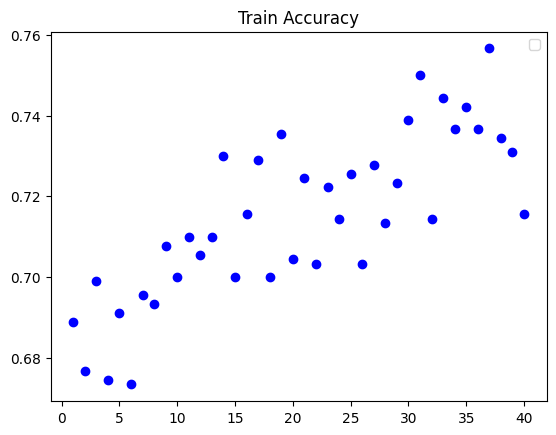

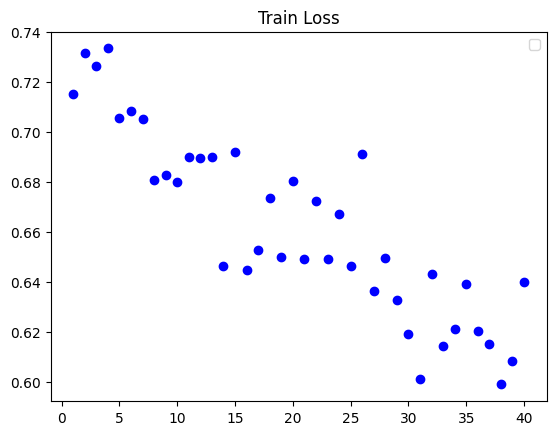

In [ ]:
history = model.fit(train_generator, epochs = 40)
				
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo')
plt.title('Train Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo')
plt.title('Train Loss')
plt.legend()

plt.show()

Evaluación del modelo

En la investigación "Pet dog facial expression recognition based on convolutional neural network and improved whale optimization algorithm", se utilizan métricas para comparar el desempeño de los modelos.

Se calcula principalmente la precisión y pérdida del modelo en entrenamiento y con pruebas de imágenes distintas a las de entrenamiento.

Los resultados obtenidos en la investigación fueron los siguientes y se tomarán como referencia para determinar si los resultados del modelo generado en este proyecto son satisfactorios o no satisfactorios.

*   Mejor precisión de entrenamiento: 95.93%
*   Peor precisión de entrenamiento: 88.26%%
*   Peor pérdida de entrenamiento: 0.226%
*   Mejor precisión de pruebas: 96.05%
*   Peor precisión de pruebas: 87.07%
*   Mejor pérdida de pruebas: 0.117%
*   Peor pérdida de pruebas: 0.253%



In [ ]:
test_datagen = ImageDataGenerator(1./255)

test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)

print('\nTest accuracy : ', test_acc)


Found 2100 images belonging to 3 classes.
25/25 [==============================] - 61s 3s/step - loss: 43.6304 - acc: 0.6240

Test accuracy :  0.6240000128746033


Resultados

Después de entrenar el modelo VGG16 con 40 generaciones y probarlo, se obtuvo un 71.56% de precisión en el entrenamiento y un 62.40% de precisión en las pruebas. Debido a que el resultado de los modelos analizados en la investigación que se utiliza como referencia tuvo un valor mínimo de precisión en entrenamiento de 88.26% y en pruebas de 87.07%, se considera que este modelo no tiene un desempeño satisfactorio y debe de ser mejorado. Por otro lado, también se puede observar que existe un overfitting en el modelo porque el resultado de precisión en pruebas fue más del 10% mayor que en entrenamiento.

Referencias

[1] Y. Mao and Y. Liu,"Pet dog facial expression recognition based on convolutional neural network and improved whale optimization algorithm". Springer Nature Scientific Reports. Feb. 2023. doi: 10.1038/s41598-023-30442-0